In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from multiprocessing import Pool

from keras.models import Model
from keras.optimizers import Adam
from keras.models import load_model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Input, Conv1D, BatchNormalization, LeakyReLU, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout, Activation, Add, Flatten

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.callbacks import ModelCheckpoint

2024-07-31 22:36:53.331907: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-31 22:36:53.383009: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-31 22:36:53.383051: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-31 22:36:53.383082: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-31 22:36:53.392073: I tensorflow/core/platform/cpu_feature_g

## System Calls List

In [2]:
syscalls = [
"sys_enter_llistxattr",
"sys_enter_setgroups",
"sys_enter_lremovexattr",
"sys_enter_sethostname",
"sys_enter_accept",
"sys_enter_lseek",
"sys_enter_setitimer",
"sys_enter_accept4",
"sys_enter_lsetxattr",
"sys_enter_setns",
"sys_enter_acct",
"sys_enter_madvise",
"sys_enter_setpgid",
"sys_enter_add_key",
"sys_enter_mbind",
"sys_enter_setpriority",
"sys_enter_adjtimex",
"sys_enter_membarrier",
"sys_enter_setregid",
"sys_enter_personality",
"sys_enter_memfd_create",
"sys_enter_setresgid",
"sys_enter_bind",
"sys_enter_memfd_secret",
"sys_enter_setresuid",
"sys_enter_bpf",
"sys_enter_migrate_pages",
"sys_enter_setreuid",
"sys_enter_brk",
"sys_enter_mincore",
"sys_enter_setrlimit",
"sys_enter_capget",
"sys_enter_mkdirat",
"sys_enter_setsid",
"sys_enter_capset",
"sys_enter_mknodat",
"sys_enter_setsockopt",
"sys_enter_chdir",
"sys_enter_mlock",
"sys_enter_settimeofday",
"sys_enter_chroot",
"sys_enter_mlock2",
"sys_enter_setuid",
"sys_enter_clock_adjtime",
"sys_enter_mlockall",
"sys_enter_setxattr",
"sys_enter_clock_getres",
"sys_enter_mmap",
"sys_enter_shmat",
"sys_enter_clock_gettime",
"sys_enter_mount",
"sys_enter_shmctl",
"sys_enter_clock_nanosleep",
"sys_enter_mount_setattr",
"sys_enter_shmdt",
"sys_enter_clock_settime",
"sys_enter_move_mount",
"sys_enter_shmget",
"sys_enter_clone",
"sys_enter_move_pages",
"sys_enter_shutdown",
"sys_enter_clone3",
"sys_enter_mprotect",
"sys_enter_sigaltstack",
"sys_enter_close",
"sys_enter_mq_getsetattr",
"sys_enter_signalfd4",
"sys_enter_close_range",
"sys_enter_mq_notify",
"sys_enter_socket",
"sys_enter_connect",
"sys_enter_mq_open",
"sys_enter_socketpair",
"sys_enter_copy_file_range",
"sys_enter_mq_timedreceive",
"sys_enter_splice",
"sys_enter_delete_module",
"sys_enter_mq_timedsend",
"sys_enter_statfs",
"sys_enter_dup",
"sys_enter_mq_unlink",
"sys_enter_statx",
"sys_enter_dup3",
"sys_enter_mremap",
"sys_enter_swapoff",
"sys_enter_epoll_create1",
"sys_enter_msgctl",
"sys_enter_swapon",
"sys_enter_epoll_ctl",
"sys_enter_msgget",
"sys_enter_symlinkat",
"sys_enter_epoll_pwait",
"sys_enter_msgrcv",
"sys_enter_sync",
"sys_enter_epoll_pwait2",
"sys_enter_msgsnd",
"sys_enter_sync_file_range",
"sys_enter_eventfd2",
"sys_enter_msync",
"sys_enter_syncfs",
"sys_enter_execve",
"sys_enter_munlock",
"sys_enter_sysinfo",
"sys_enter_execveat",
"sys_enter_munlockall",
"sys_enter_syslog",
"sys_enter_exit",
"sys_enter_munmap",
"sys_enter_tee",
"sys_enter_exit_group",
"sys_enter_name_to_handle_at",
"sys_enter_tgkill",
"sys_enter_faccessat",
"sys_enter_nanosleep",
"sys_enter_timer_create",
"sys_enter_faccessat2",
"sys_enter_newfstat",
"sys_enter_timer_delete",
"sys_enter_fadvise64",
"sys_enter_newfstatat",
"sys_enter_timer_getoverrun",
"sys_enter_fallocate",
"sys_enter_newuname",
"sys_enter_timer_gettime",
"sys_enter_fanotify_init",
"sys_enter_open_by_handle_at",
"sys_enter_timer_settime",
"sys_enter_fanotify_mark",
"sys_enter_open_tree",
"sys_enter_timerfd_create",
"sys_enter_fchdir",
"sys_enter_openat",
"sys_enter_timerfd_gettime",
"sys_enter_fchmod",
"sys_enter_openat2",
"sys_enter_timerfd_settime",
"sys_enter_fchmodat",
"sys_enter_perf_event_open",
"sys_enter_times",
"sys_enter_fchown",
"sys_enter_pidfd_getfd",
"sys_enter_tkill",
"sys_enter_fchownat",
"sys_enter_pidfd_open",
"sys_enter_truncate",
"sys_enter_fcntl",
"sys_enter_pidfd_send_signal",
"sys_enter_umask",
"sys_enter_fdatasync",
"sys_enter_pipe2",
"sys_enter_umount",
"sys_enter_fgetxattr",
"sys_enter_pivot_root",
"sys_enter_unlinkat",
"sys_enter_finit_module",
"sys_enter_ppoll",
"sys_enter_unshare",
"sys_enter_flistxattr",
"sys_enter_prctl",
"sys_enter_userfaultfd",
"sys_enter_flock",
"sys_enter_pread64",
"sys_enter_utimensat",
"sys_enter_fremovexattr",
"sys_enter_preadv",
"sys_enter_vhangup",
"sys_enter_fsconfig",
"sys_enter_preadv2",
"sys_enter_vmsplice",
"sys_enter_fsetxattr",
"sys_enter_prlimit64",
"sys_enter_wait4",
"sys_enter_fsmount",
"sys_enter_process_madvise",
"sys_enter_waitid",
"sys_enter_fsopen",
"sys_enter_process_mrelease",
"sys_enter_write",
"sys_enter_fspick",
"sys_enter_process_vm_readv",
"sys_enter_writev",
"sys_enter_fstatfs",
"sys_enter_process_vm_writev",
"sys_enter_fsync",
"sys_enter_pselect6",
"sys_enter_ftruncate",
"sys_enter_ptrace",
"sys_enter_futex",
"sys_enter_pwrite64",
"sys_enter_get_mempolicy",
"sys_enter_pwritev",
"sys_enter_get_robust_list",
"sys_enter_pwritev2",
"sys_enter_getcpu",
"sys_enter_quotactl",
"sys_enter_getcwd",
"sys_enter_quotactl_fd",
"sys_enter_getdents64",
"sys_enter_read",
"sys_enter_getegid",
"sys_enter_readahead",
"sys_enter_geteuid",
"sys_enter_readlinkat",
"sys_enter_getgid",
"sys_enter_readv",
"sys_enter_getgroups",
"sys_enter_reboot",
"sys_enter_getitimer",
"sys_enter_recvfrom",
"sys_enter_getpeername",
"sys_enter_recvmmsg",
"sys_enter_getpgid",
"sys_enter_recvmsg",
"sys_enter_getpid",
"sys_enter_remap_file_pages",
"sys_enter_getppid",
"sys_enter_removexattr",
"sys_enter_getpriority",
"sys_enter_renameat",
"sys_enter_getrandom",
"sys_enter_renameat2",
"sys_enter_getresgid",
"sys_enter_request_key",
"sys_enter_getresuid",
"sys_enter_restart_syscall",
"sys_enter_getrlimit",
"sys_enter_rseq",
"sys_enter_getrusage",
"sys_enter_rt_sigaction",
"sys_enter_getsid",
"sys_enter_rt_sigpending",
"sys_enter_getsockname",
"sys_enter_rt_sigprocmask",
"sys_enter_getsockopt",
"sys_enter_rt_sigqueueinfo",
"sys_enter_gettid",
"sys_enter_rt_sigreturn",
"sys_enter_gettimeofday",
"sys_enter_rt_sigsuspend",
"sys_enter_getuid",
"sys_enter_rt_sigtimedwait",
"sys_enter_getxattr",
"sys_enter_rt_tgsigqueueinfo",
"sys_enter_init_module",
"sys_enter_sched_get_priority_max",
"sys_enter_inotify_add_watch",
"sys_enter_sched_get_priority_min",
"sys_enter_inotify_init1",
"sys_enter_sched_getaffinity",
"sys_enter_inotify_rm_watch",
"sys_enter_sched_getattr",
"sys_enter_io_cancel",
"sys_enter_sched_getparam",
"sys_enter_io_destroy",
"sys_enter_sched_getscheduler",
"sys_enter_io_getevents",
"sys_enter_sched_rr_get_interval",
"sys_enter_io_pgetevents",
"sys_enter_sched_setaffinity",
"sys_enter_io_setup",
"sys_enter_sched_setattr",
"sys_enter_io_submit",
"sys_enter_sched_setparam",
"sys_enter_io_uring_enter",
"sys_enter_sched_setscheduler",
"sys_enter_io_uring_register",
"sys_enter_sched_yield",
"sys_enter_io_uring_setup",
"sys_enter_seccomp",
"sys_enter_ioctl",
"sys_enter_semctl",
"sys_enter_ioprio_get",
"sys_enter_semget",
"sys_enter_ioprio_set",
"sys_enter_semop",
"sys_enter_kcmp",
"sys_enter_semtimedop",
"sys_enter_kexec_file_load",
"sys_enter_sendfile64",
"sys_enter_kexec_load",
"sys_enter_sendmmsg",
"sys_enter_keyctl",
"sys_enter_sendmsg",
"sys_enter_kill",
"sys_enter_sendto",
"sys_enter_landlock_add_rule",
"sys_enter_set_mempolicy",
"sys_enter_landlock_create_ruleset",
"sys_enter_set_robust_list",
"sys_enter_landlock_restrict_self",
"sys_enter_set_tid_address",
"sys_enter_lgetxattr",
"sys_enter_setdomainname",
"sys_enter_linkat",
"sys_enter_setfsgid",
"sys_enter_listen",
"sys_enter_setfsuid",
"sys_enter_listxattr",
"sys_enter_setgid"
]

## Loading CSV from Desktop

In [3]:
NUM_CLASSES = 3
CLASSES = np.array(['benign', 'sysrv', 'xmrig'])
DATASET_DIR = "raw_data"
VECTOR_LENGTH = 32 * 32

label_encoder = LabelEncoder()
label_encoder.fit(syscalls)

def csvToVector(file_path):
    try:
        data = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        data = pd.read_csv(file_path, encoding='ISO-8859-1')
    
    data_encoded = label_encoder.fit_transform(data['SYSTEM_CALL'])
    vector = np.zeros(VECTOR_LENGTH, dtype=np.uint8)
    syscall_nums = min(len(data_encoded), VECTOR_LENGTH)
    vector[:syscall_nums] = data_encoded[:syscall_nums]

    return vector

def process_file(args):
    file_path, class_idx = args
    vector = csvToVector(file_path)
    return vector, class_idx

def load_data(dataset_dir):
    x = []
    y = []
    classes = ["0/60sec_0", "1/60sec_1", "2/60sec_2"]

    file_paths = []
    for class_idx, class_name in enumerate(classes):
        class_dir = os.path.join(dataset_dir, class_name)
        for file_name in os.listdir(class_dir):
            if file_name.endswith('.csv'):
                file_path = os.path.join(class_dir, file_name)
                file_paths.append((file_path, class_idx))

    with Pool() as pool:
        results = pool.map(process_file, file_paths)

    x, y = zip(*results)
    x = np.array(x)
    y = np.array(y)

    return x, y

In [4]:
X, y = load_data(DATASET_DIR)

## Train, Validation, Test Split and Nomalize

In [5]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train = X_train / 299.0
X_val = X_val / 299.0
X_test = X_test / 299.0

y_train = to_categorical(y_train, 3)
y_val = to_categorical(y_val, 3)
y_test = to_categorical(y_test, 3)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1174, 1024)
(630, 1024)
(1174, 3)
(630, 3)


## 1D CNN model

In [7]:
input_layer = Input(shape=(VECTOR_LENGTH, 1))

x = Conv1D(filters=32, kernel_size=3, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=64, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Flatten()(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

2024-07-29 17:44:49.372218: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31350 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:06:00.0, compute capability: 7.0
2024-07-29 17:44:49.372773: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 31350 MB memory:  -> device: 1, name: CUDA GPU, pci bus id: 0000:2f:00.0, compute capability: 7.0
2024-07-29 17:44:49.373264: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 31350 MB memory:  -> device: 2, name: CUDA GPU, pci bus id: 0000:86:00.0, compute capability: 7.0


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 1024, 32)          128       
                                                                 
 batch_normalization (Batch  (None, 1024, 32)          128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1024, 32)          0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 512, 32)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 512, 64)           6208  

## Check Point

In [9]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
checkpoint = ModelCheckpoint(
    filepath='/tmp/CNN1d_checkpoint.h5',
    save_best_only=True,
    monitor='accuracy',
    mode='max',
    verbose=1
)

## Model Training

In [10]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[reduce_lr, checkpoint])

Epoch 1/100


2024-07-29 17:44:52.320672: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-07-29 17:44:53.733561: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f473221f980 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-29 17:44:53.733595: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 7.0
2024-07-29 17:44:53.733601: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): CUDA GPU, Compute Capability 7.0
2024-07-29 17:44:53.733606: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): CUDA GPU, Compute Capability 7.0
2024-07-29 17:44:53.739420: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-29 17:44:53.832902: I ./tensorflow/compiler/jit/device_compiler.h:186] Compi

37/37 [==============================] - ETA: 0s - loss: 0.5902 - accuracy: 0.8475
Epoch 1: accuracy improved from -inf to 0.84753, saving model to /tmp/CNN1d_checkpoint.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37/37 [==============================] - 6s 27ms/step - loss: 0.5902 - accuracy: 0.8475 - val_loss: 0.9799 - val_accuracy: 0.6361 - lr: 0.0010
Epoch 2/100
37/37 [==============================] - ETA: 0s - loss: 0.3010 - accuracy: 0.9208
Epoch 2: accuracy improved from 0.84753 to 0.92078, saving model to /tmp/CNN1d_checkpoint.h5
37/37 [==============================] - 1s 14ms/step - loss: 0.3010 - accuracy: 0.9208 - val_loss: 0.9359 - val_accuracy: 0.6361 - lr: 0.0010
Epoch 3/100
37/37 [==============================] - ETA: 0s - loss: 0.1786 - accuracy: 0.9438
Epoch 3: accuracy improved from 0.92078 to 0.94378, saving model to /tmp/CNN1d_checkpoint.h5
37/37 [==============================] - 1s 14ms/step - loss: 0.1786 - accuracy: 0.9438 - val_loss: 0.9397 - val_accuracy: 0.6361 - lr: 0.0010
Epoch 4/100
37/37 [==============================] - ETA: 0s - loss: 0.1762 - accuracy: 0.9497
Epoch 4: accuracy improved from 0.94378 to 0.94974, saving model to /tmp/CNN1d_checkpoint.h5
37/37 [

## Load best Checkpoint

In [6]:
cp_model = load_model('/tmp/60_CNN1d_checkpoint.h5')
cp_model.evaluate(X_test, y_test, batch_size=1000)

2024-07-31 22:38:26.089294: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31350 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:06:00.0, compute capability: 7.0
2024-07-31 22:38:26.089840: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 31350 MB memory:  -> device: 1, name: CUDA GPU, pci bus id: 0000:2f:00.0, compute capability: 7.0
2024-07-31 22:38:26.090332: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 31350 MB memory:  -> device: 2, name: CUDA GPU, pci bus id: 0000:86:00.0, compute capability: 7.0
2024-07-31 22:38:27.556346: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907


1/1 [==============================] - 1s 699ms/step - loss: 0.1107 - accuracy: 0.9667


[0.1107228696346283, 0.9666666388511658]

## Evaluate

In [7]:
y_pred = cp_model.predict(X_test)

20/20 [==============================] - 0s 3ms/step


In [8]:
preds_single = CLASSES[np.argmax(y_pred, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

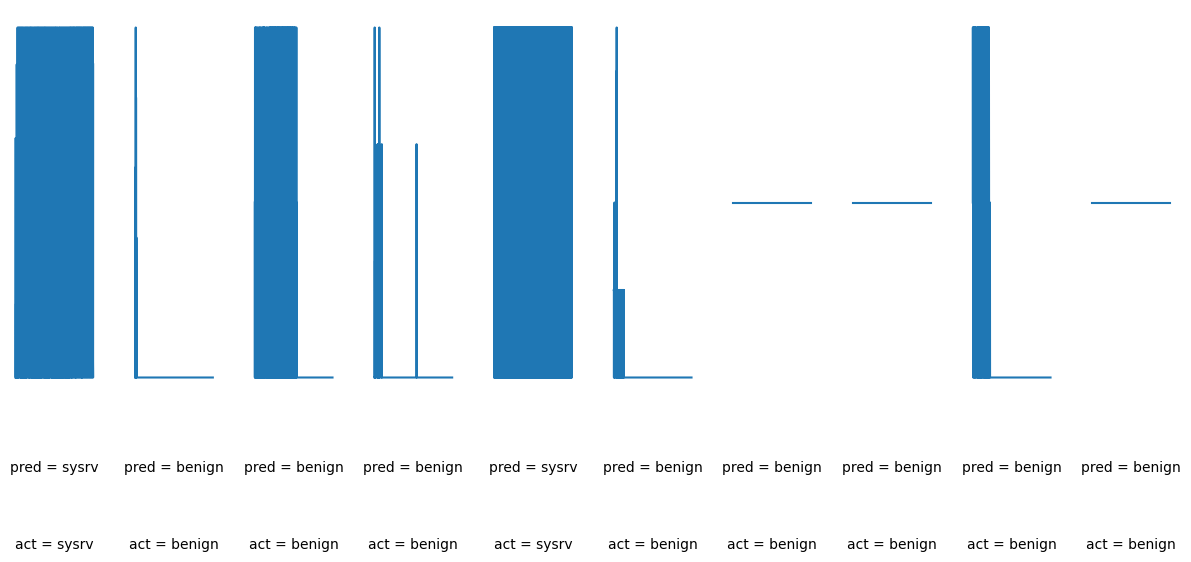

In [9]:
n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    data = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.plot(data)
    ax.axis('off')
    ax.text(0.5, -0.2, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.4, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)

plt.show()

In [12]:
y_pred_classes = tf.argmax(y_pred, axis=1)
y_test_classes = tf.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes, digits=4))

              precision    recall  f1-score   support

           0     0.9689    0.9894    0.9791       378
           1     0.9934    0.9677    0.9804       155
           2     0.9140    0.8763    0.8947        97

    accuracy                         0.9667       630
   macro avg     0.9588    0.9445    0.9514       630
weighted avg     0.9665    0.9667    0.9664       630



In [11]:
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

class_labels = ['Benign', 'Sysrv', 'Xmrig']

conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

print("Confusion Matrix:")
print(conf_matrix_df)

Confusion Matrix:
        Benign  Sysrv  Xmrig
Benign     374      0      4
Sysrv        1    150      4
Xmrig       11      1     85
